# Clustering on Toy Datasets

In [1]:
import time
import warnings
import collections
import numpy as np
import matplotlib.pyplot as plt
import queue
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
%matplotlib inline


# Comparing different clustering algorithms on toy datasets

This example shows characteristics of different
clustering algorithms on datasets that are "interesting"
but still in 2D. With the exception of the last dataset,
the parameters of each of these dataset-algorithm pairs
has been tuned to produce good clustering results. Some
algorithms are more sensitive to parameter values than
others.

The last dataset is an example of a 'null' situation for
clustering: the data is homogeneous, and there is no good
clustering. For this example, the null dataset uses the
same parameters as the dataset in the row above it, which
represents a mismatch in the parameter values and the
data structure.

While these examples give some intuition about the
algorithms, this intuition might not apply to very high
dimensional data.


Automatically created module for IPython interactive environment


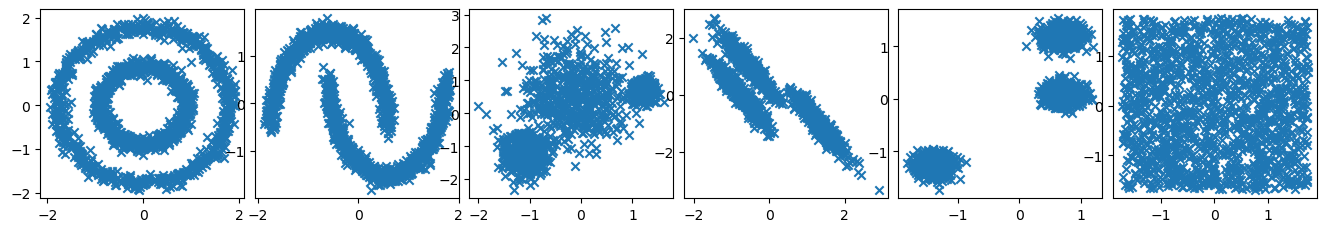

In [13]:
import time
import warnings
import collections
import numpy as np
import matplotlib.pyplot as plt
import queue
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice



print(__doc__)


np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(20,4))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.95, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)
    plt.subplot(len(dataset), len(params), plot_num)
    plt.scatter(X[:,0],X[:,1],marker='x')
    plt.show
    plot_num+=1 


### Select the Dataset


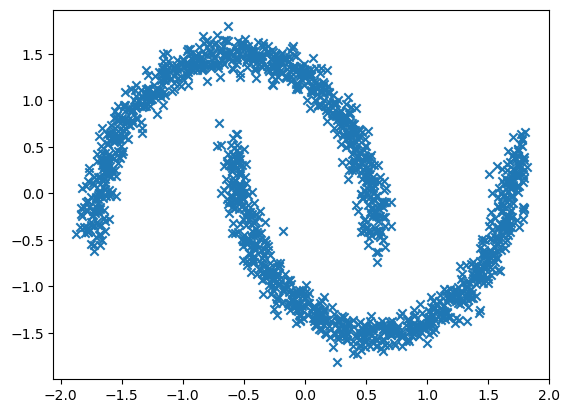

In [14]:
dataset,algo_params=(datasets[1])
X,y=(dataset)
X=StandardScaler().fit_transform(X)
plt.scatter(X[:,0],X[:,1],marker='x')
plt.show() 

## K-Means Clustering

[[-1.32021886 -1.48738045]
 [ 0.16747481 -1.55519511]]


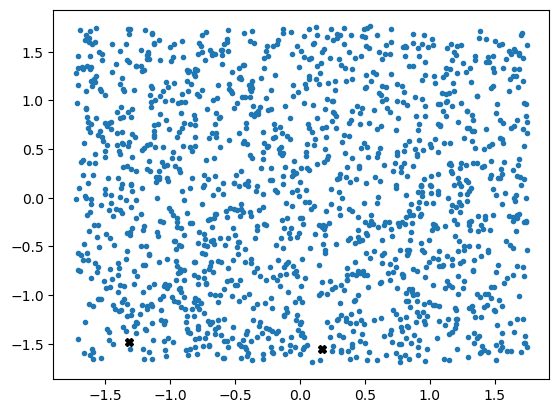

In [3]:
K=2 # no of clusters
KMI=20  # no of iterations

# random initialization of clusters
idx=np.random.randint(0,X.shape[0],K)
cntrd=X[idx,:]
print(cntrd)

# initialized a array to store distance, assigned label, minimum distance
distance=np.zeros((X.shape[0],K+2))



plt.figure()
plt.plot(X[:,0],X[:,1],'.')
plt.plot(cntrd[:,0],cntrd[:,1],'X',color='k')


/tmp/ipykernel_109814/2084411412.py:30: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(X[id,0],X[id,1],'.',color=clr[l],marker=mrk[l])
/tmp/ipykernel_109814/2084411412.py:30: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(X[id,0],X[id,1],'.',color=clr[l],marker=mrk[l])
/tmp/ipykernel_109814/2084411412.py:30: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(X[id,0],X[id,1],'.',color=clr[l],marker=mrk[l])
/tmp/ipykernel_109814/2084411412.py:30: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(X[id,0],X[id,1],

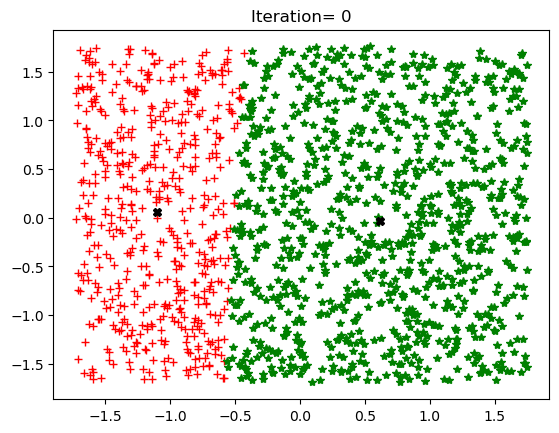

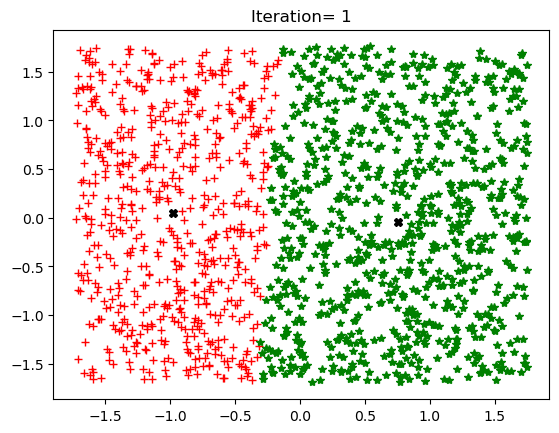

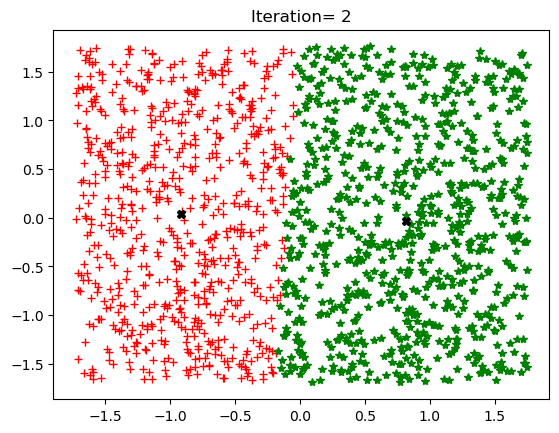

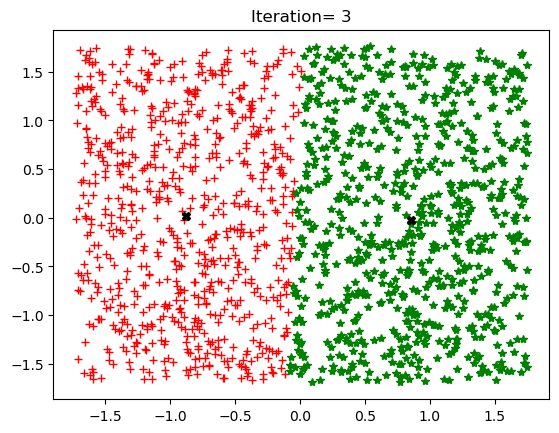

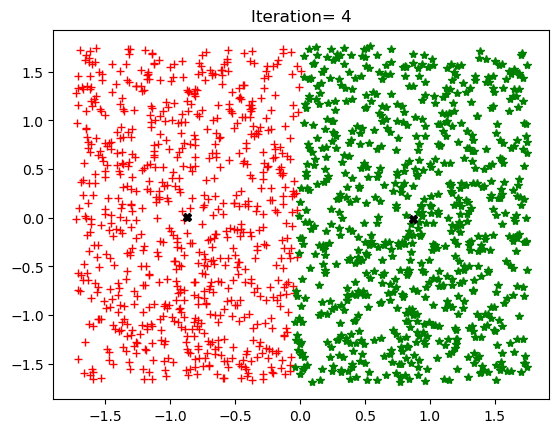

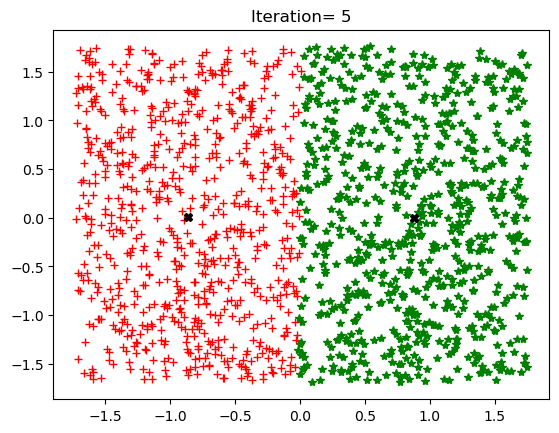

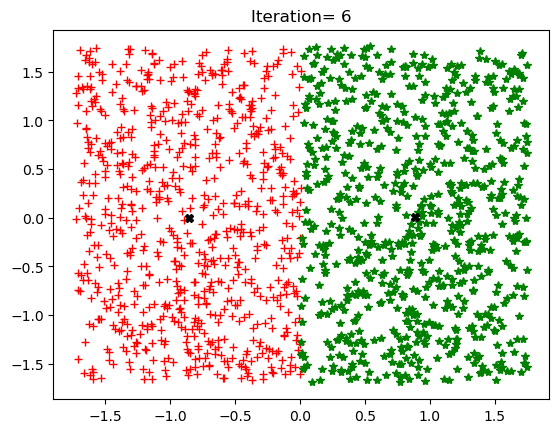

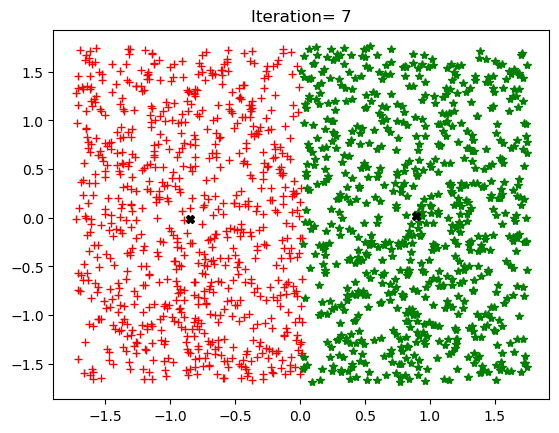

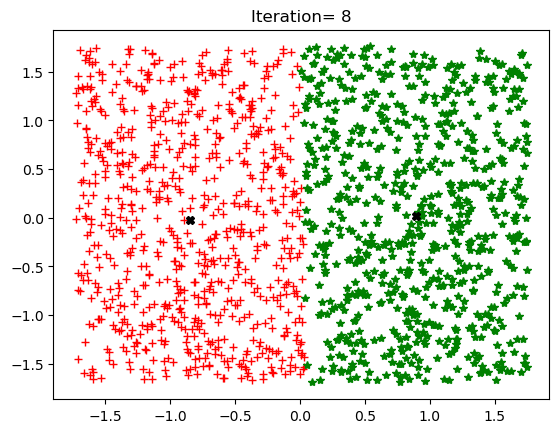

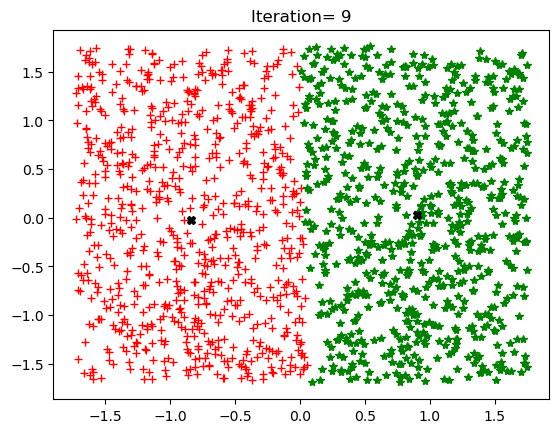

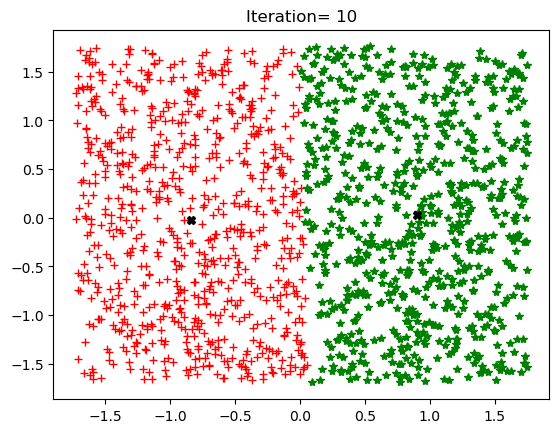

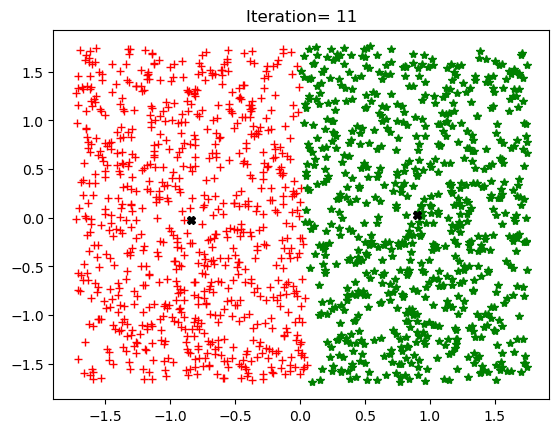

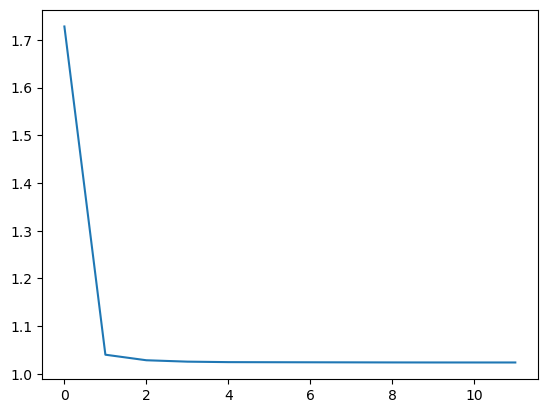

In [4]:

error=[]
eps=10**(-14)  # for threshold
clr=['r','g','b','y','k','m','c']
mrk=['+','*','X','o','.','<','p']


for n in range(KMI):
# assignment stage
  for i in range(X.shape[0]):
    for j in range(K):
      distance[i,j]=np.linalg.norm(X[i,:]-cntrd[j,:])

    Dist=np.min(distance[i,:K])
    ind=int((np.where(Dist==distance[i,:K])[0]))
    distance[i,K]=ind
    distance[i,K+1]=Dist

# re-estimation stage
  for i in range(K):
    ind=np.where(distance[:,K]==i)
    cntrd[i,:]=np.mean(X[ind,:][0],axis=0)

  error.append(np.mean(distance[:,K+1]))  
  # print(cntrd)

# for ploting 
  plt.figure()
  for l in range(K):
    id=np.where(distance[:,K]==l)
    plt.plot(X[id,0],X[id,1],color=clr[l],marker=mrk[l])
  plt.plot(cntrd[:,0],cntrd[:,1],'X',color='k')
  plt.title('Iteration= %d' % (n))

  if n>2:
   if abs(error[n]-error[n-1])<eps:
    break




# plot the error curve
plt.figure()
plt.plot(error)

## GMM Clustering

In [5]:
def initialization(data,K):

  # write your code here
  d=X.shape[1] # dimension of data
  # print(d)


# mean initialization
  pick_means=np.random.randint(0,X.shape[0],K)
  means=data[pick_means,:]
  means=np.transpose(means)

# covariance matrix initialization
  Covariance=np.zeros((d,d,K))
  for i in range(K):
    Covariance[:,:,i]=np.eye(d)*np.max(X,axis=None)    
    
#mixing coefficients
  proportions=np.ones((K,1))/K

  theta=[means,Covariance,proportions]

  cntrd=means.T
    
  return theta

In [6]:
# E-Step GMMmatches_raw_df = pd.read_csv('matches.csv')
from scipy.stats import multivariate_normal

def E_Step_GMM(data,K,theta):

    # write your code here
    means=theta[0]
    Covariance=theta[1]
    proportions=theta[2]
    #Computing responsibility coefficients of each point for each cluster.
    responsibility=np.zeros((len(X),K))
    for i in range(K):
        itr=0   # increase w.r.t datapoint 
        for x in X:
            normalising=0
# Compute probability of xj for cluster i 
            N_xn=multivariate_normal.pdf(x,mean=means[:,i], cov=Covariance[:,:,i])
            # # only to avoid 
            # if N_xn<10**(-20):
            #   N_xn=10**(-20)

            
            responsibility[itr][i]=proportions[i]*N_xn

            for j in range(K):
                normalising+=proportions[j]*(multivariate_normal.pdf(x,mean=means[:,j], cov=Covariance[:,:,j])+10**(-20))
            responsibility[itr][i]=responsibility[itr][i]/normalising
            itr+=1

    return responsibility

In [7]:

# M-STEP GMM

def M_Step_GMM(data,responsibility):
    
    # write your code here
    [N,K]=np.shape(responsibility) #N is number of data points
    d=data.shape[1]
    
    #Compute Proportions
    Nk=np.sum(responsibility,axis=0)
    proportions=Nk/N
        
    #Compute Means
    means=np.zeros((K,d))        
    for k in range(K):
        temp1=data
        temp2=responsibility[:,k]
        temp=temp1*temp2[:,None] #multiplying a vector with multiple columns
        means[k]=(1/Nk[k])*np.sum(temp,axis=0)  
    means=np.transpose(means)
        
    #Compute Covariance
    Covariance=np.zeros((d,d,K))        
    for k in range(K):
        for n in range(N):
            temp1=data[n,:]-means[:,k]
            temp2=np.outer(temp1,np.transpose(temp1)) # vector outer product
            temp=responsibility[n,k]*temp2
            Covariance[:,:,k]+=temp
        Covariance[:,:,k]=(1/Nk[k])*Covariance[:,:,k]
    
    theta=[means,Covariance,proportions]
    Likelihood=0
    log_likelihood=0
    for n in range(N):
        for k in range(K):
            Likelihood+=proportions[k]*(multivariate_normal.pdf(data[n,:],mean=means[:,k], cov=Covariance[:,:,k]))
        log_likelihood+=np.log(Likelihood)
           
    return theta, log_likelihood

/tmp/ipykernel_109814/2298811939.py:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(X[id,0],X[id,1],'.',color=clr[l],marker=mrk[l])
/tmp/ipykernel_109814/2298811939.py:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(X[id,0],X[id,1],'.',color=clr[l],marker=mrk[l])
/tmp/ipykernel_109814/2298811939.py:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(X[id,0],X[id,1],'.',color=clr[l],marker=mrk[l])
/tmp/ipykernel_109814/2298811939.py:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(X[id,0],X[id,1],

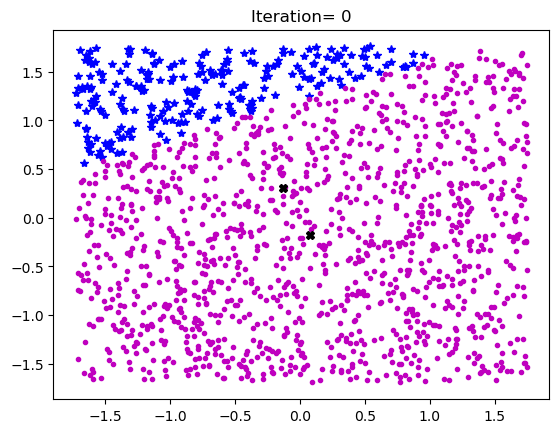

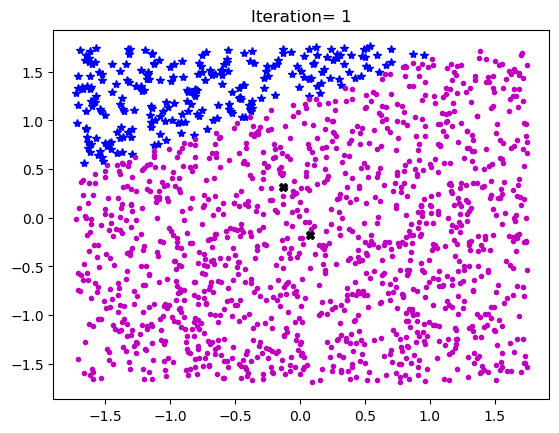

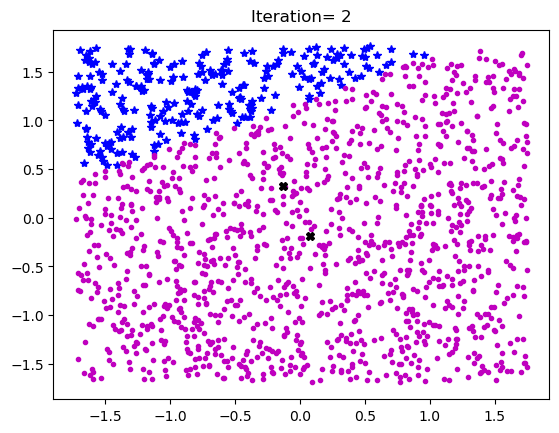

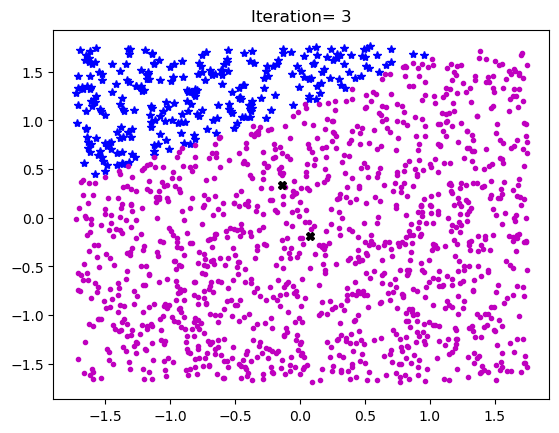

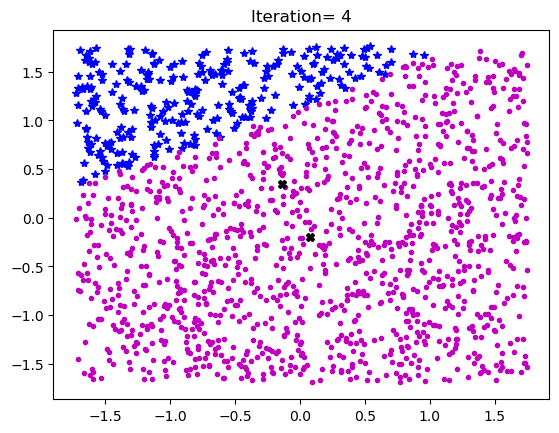

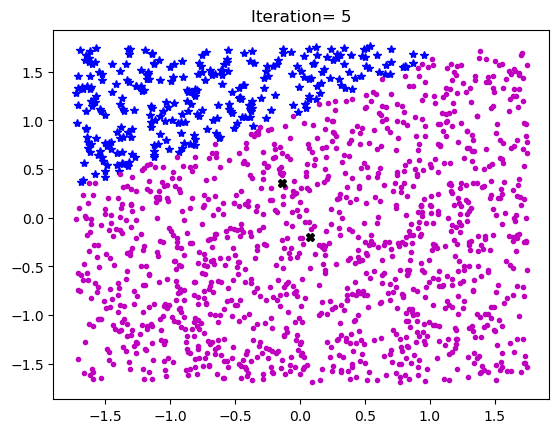

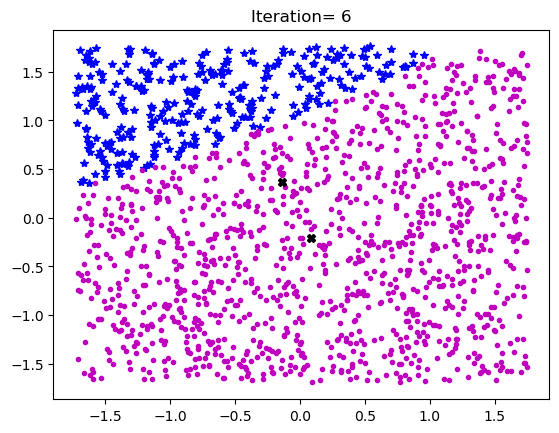

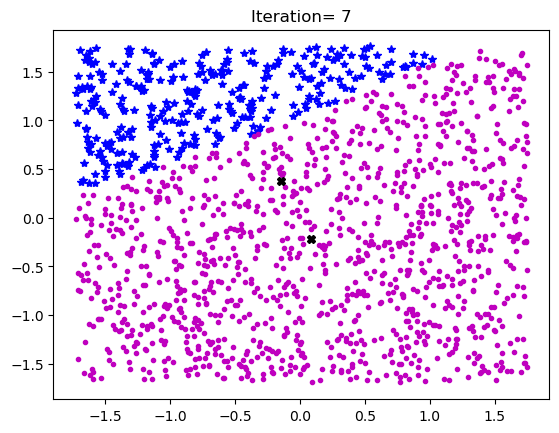

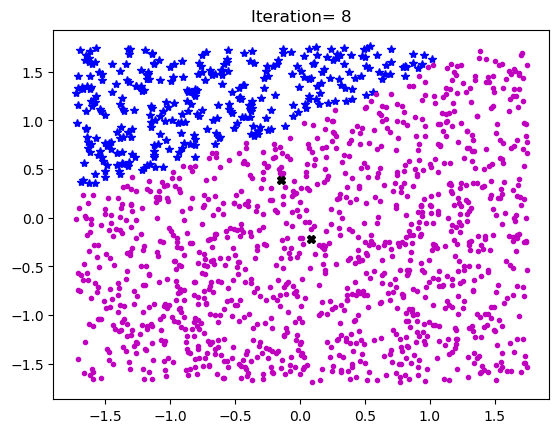

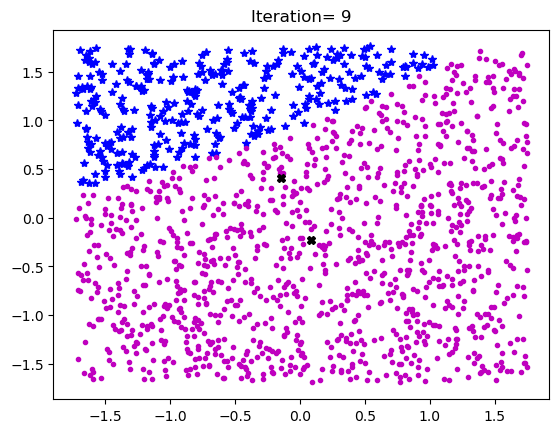

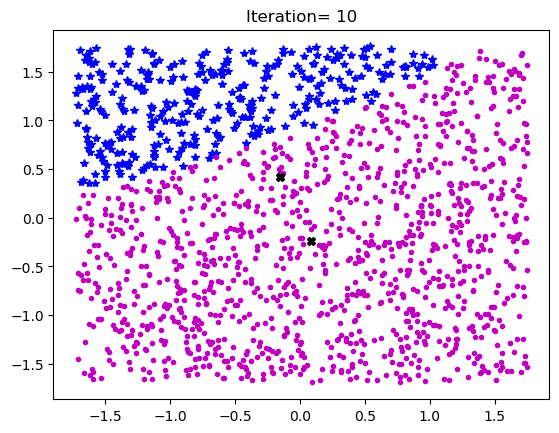

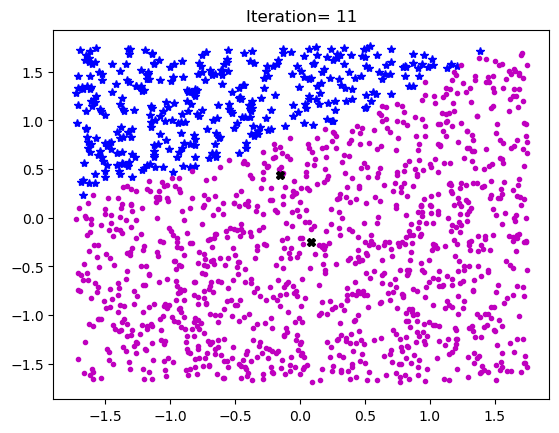

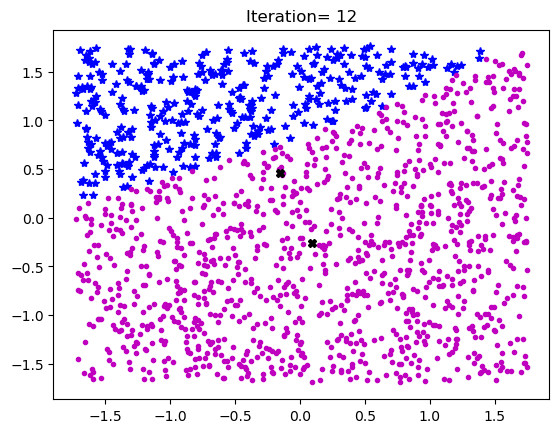

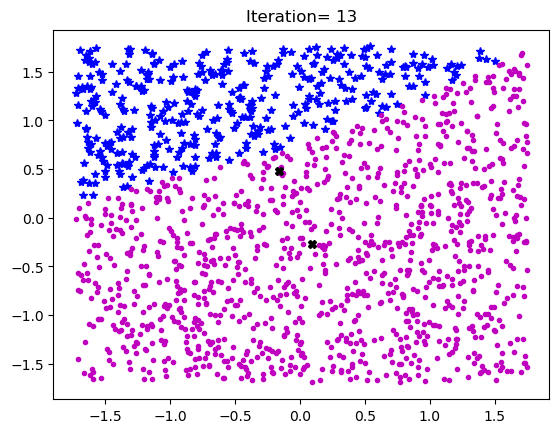

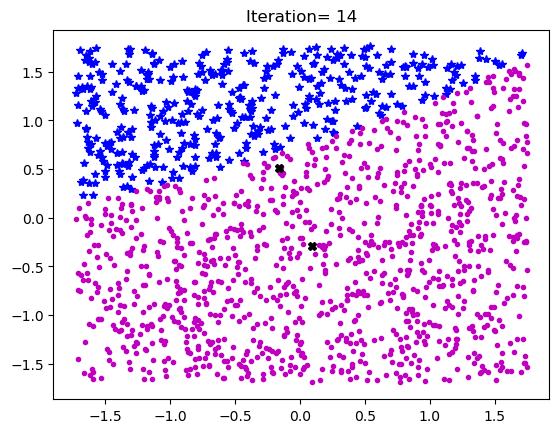

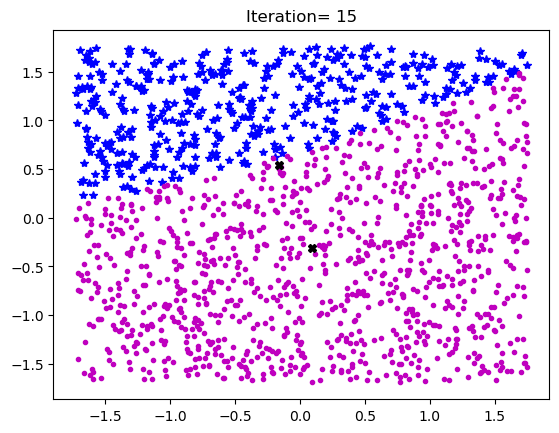

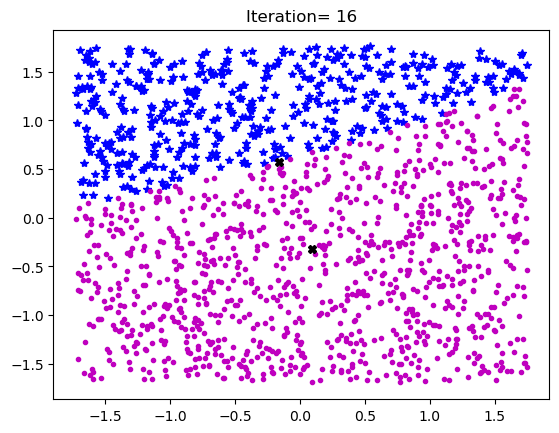

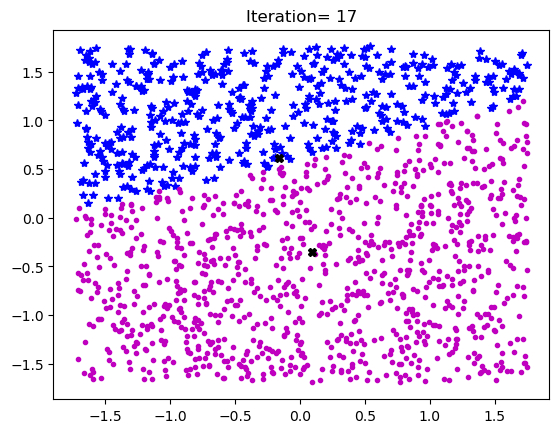

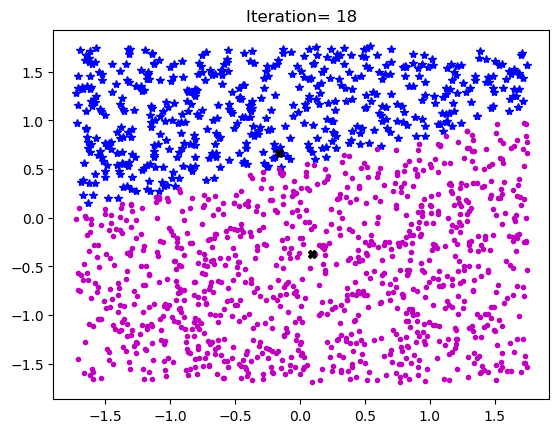

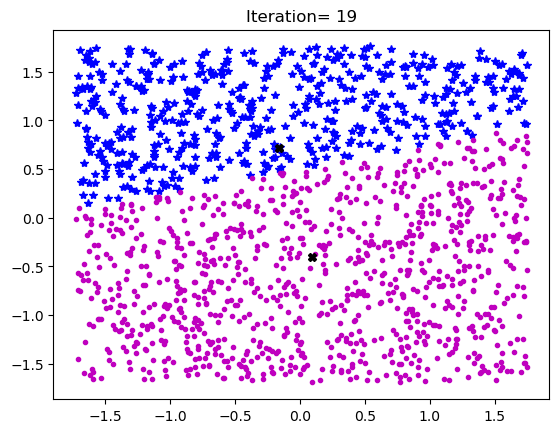

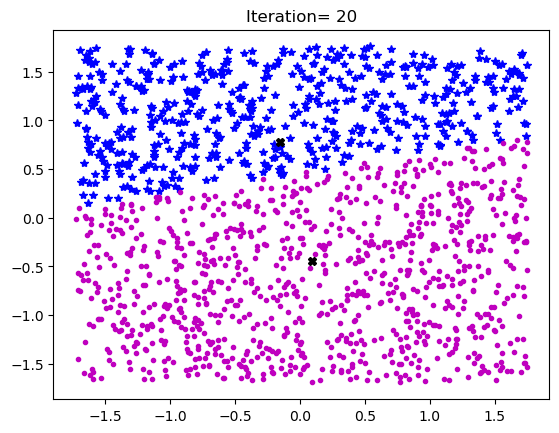

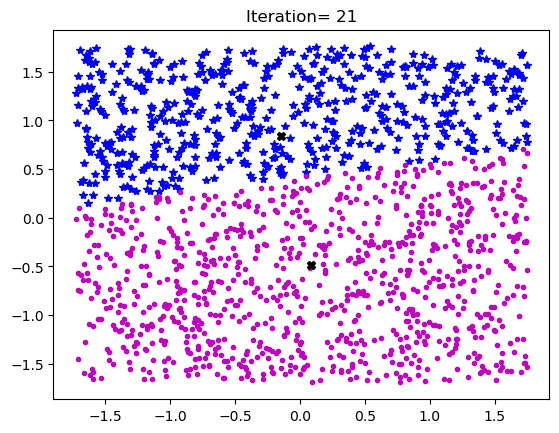

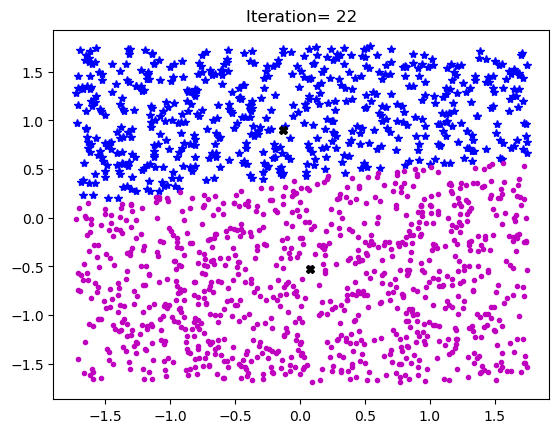

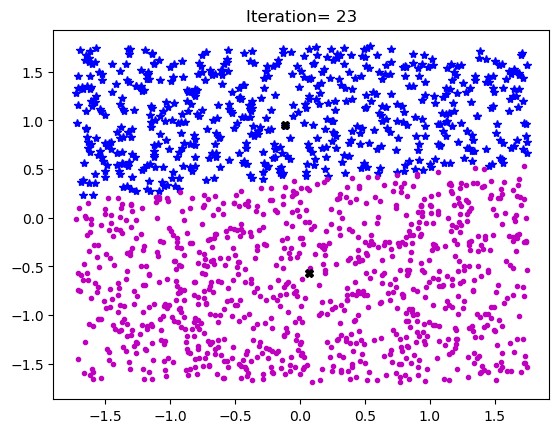

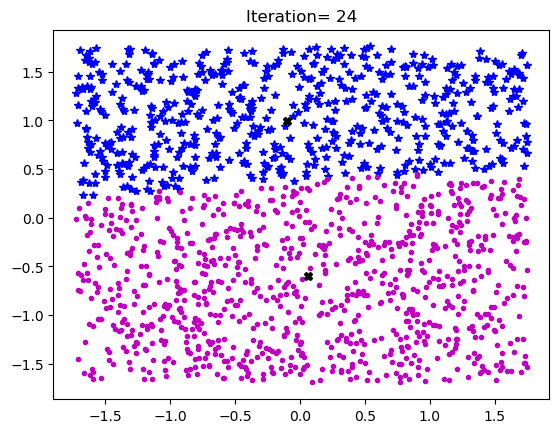

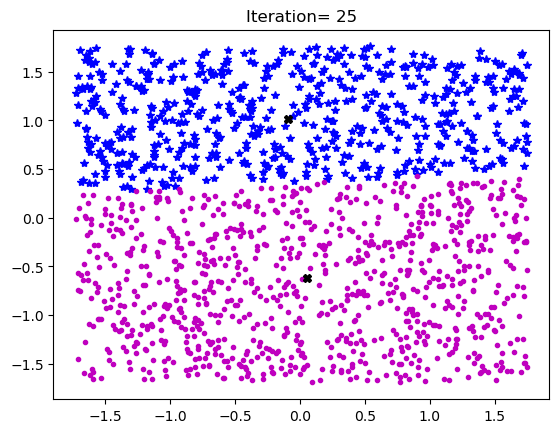

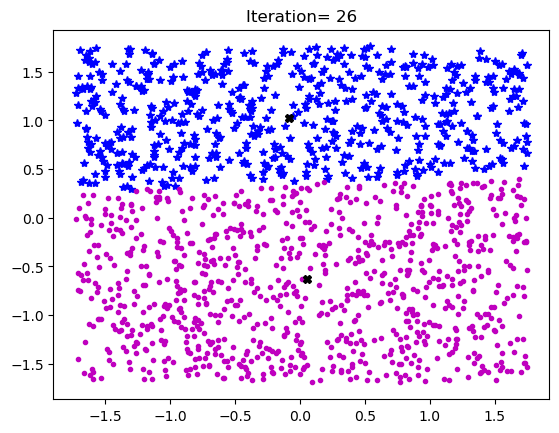

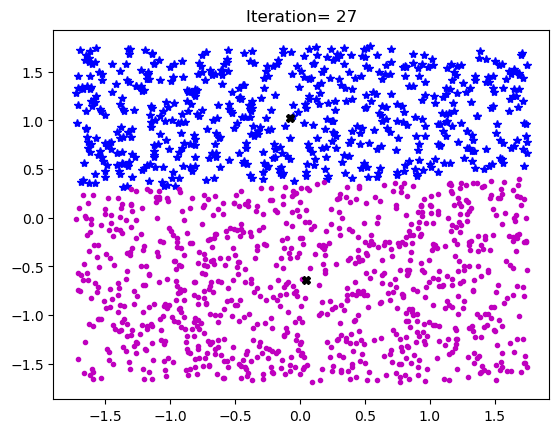

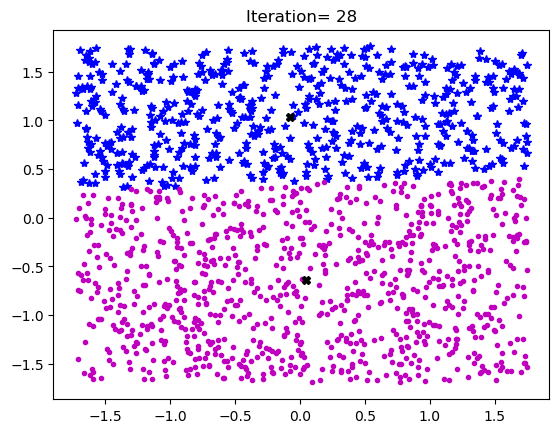

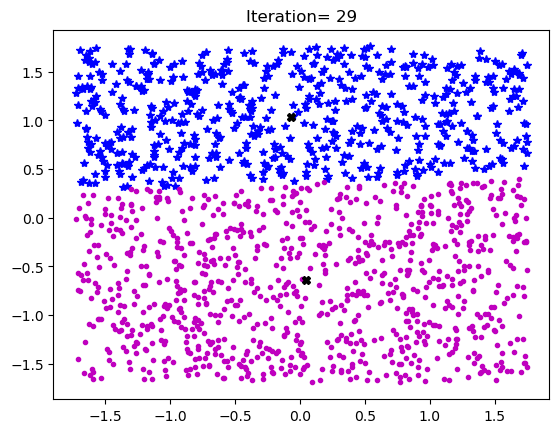

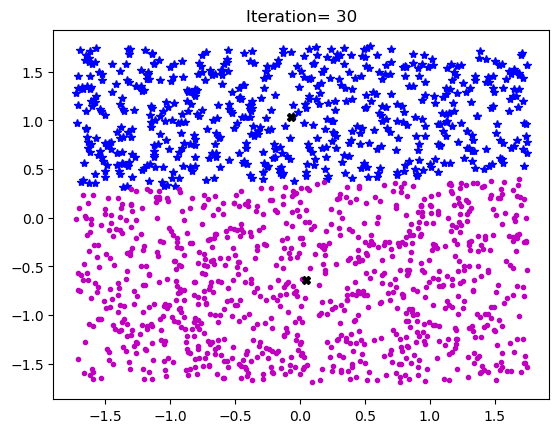

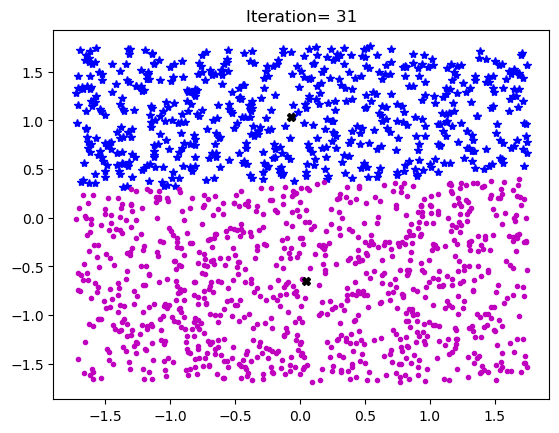

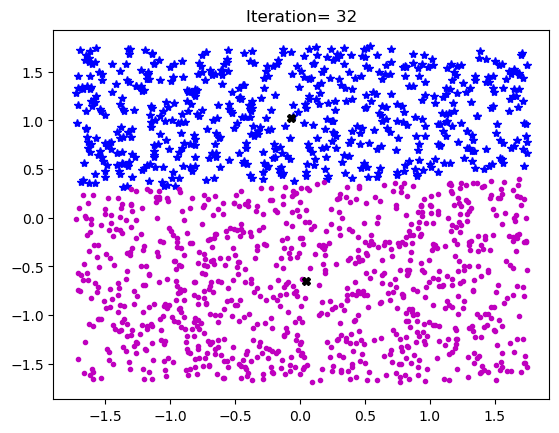

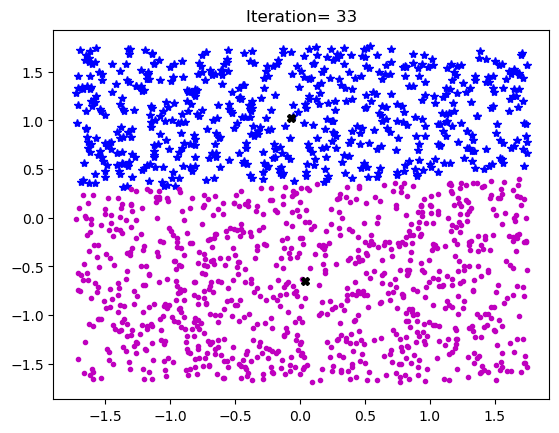

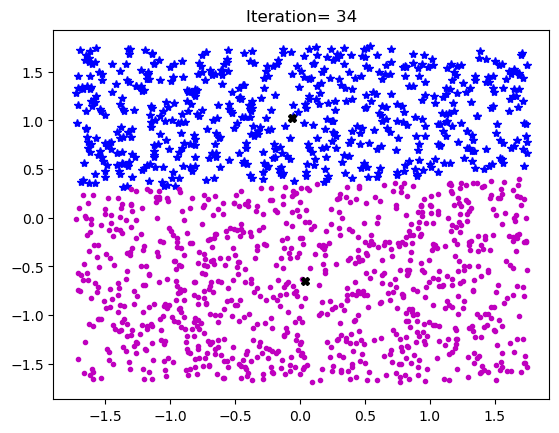

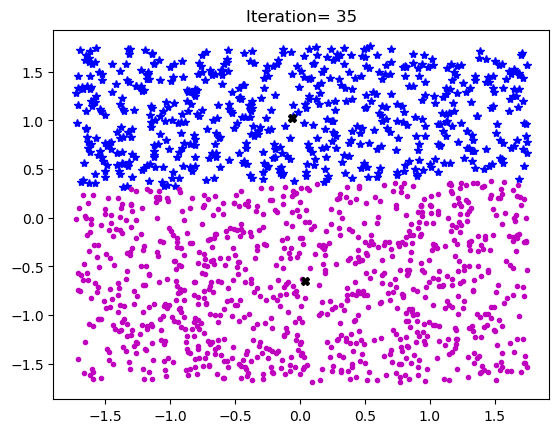

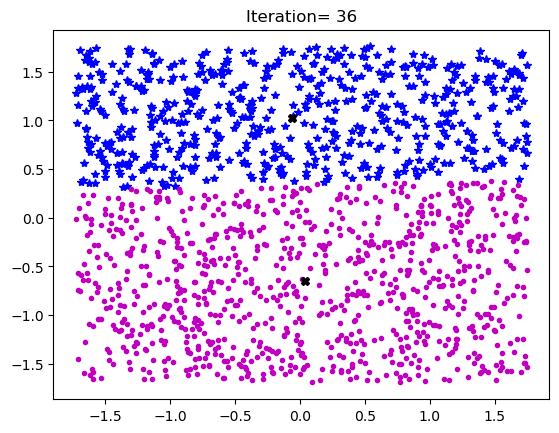

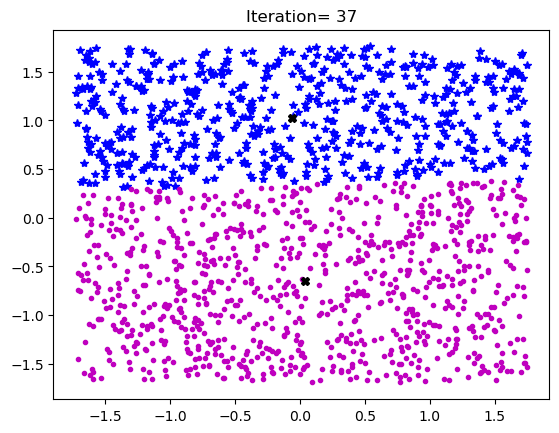

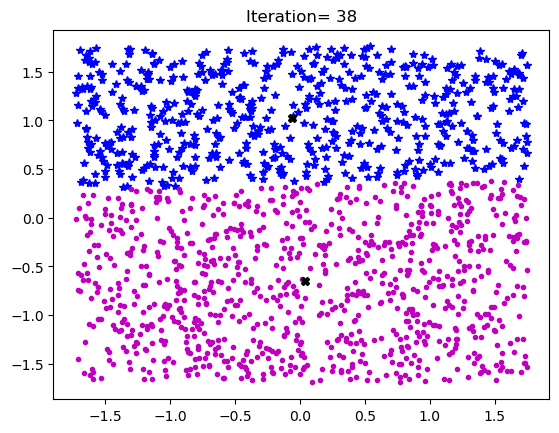

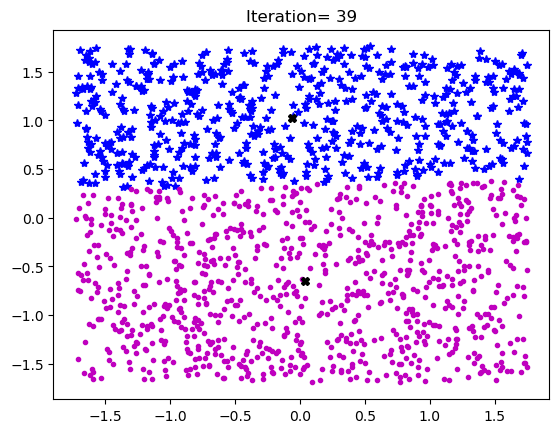

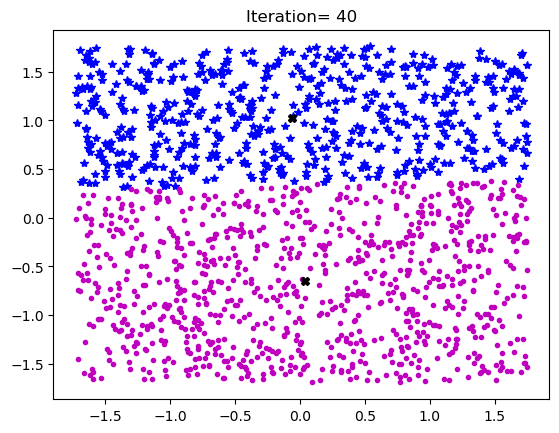

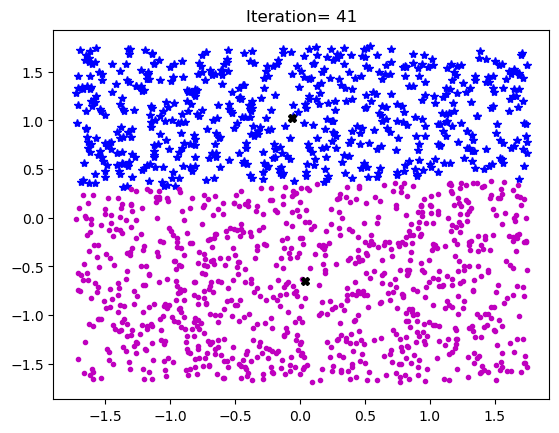

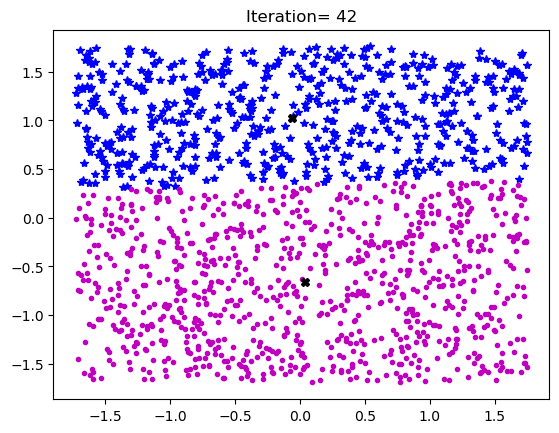

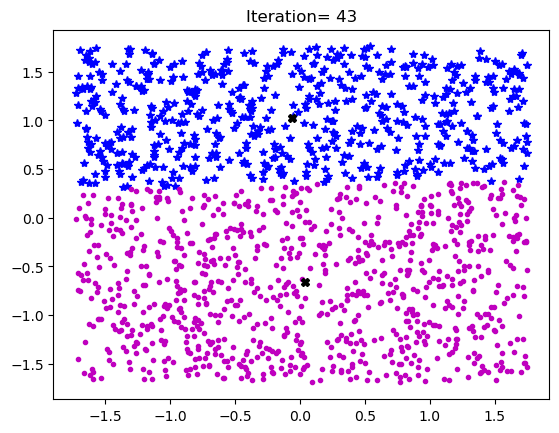

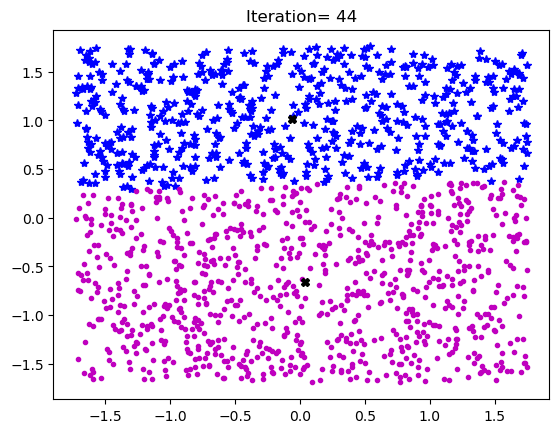

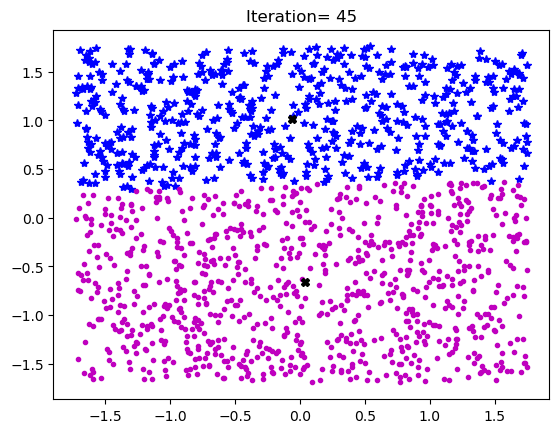

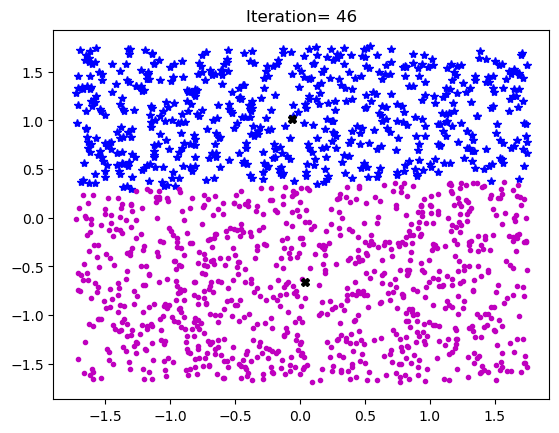

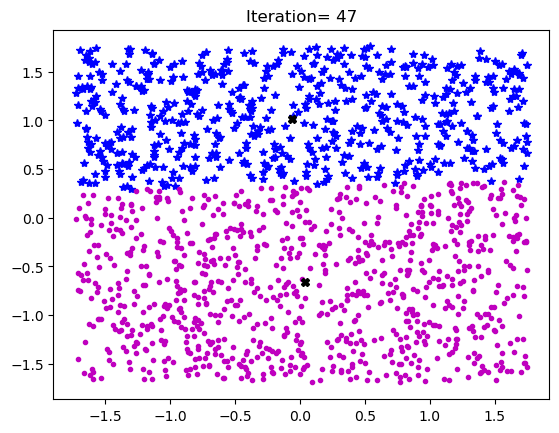

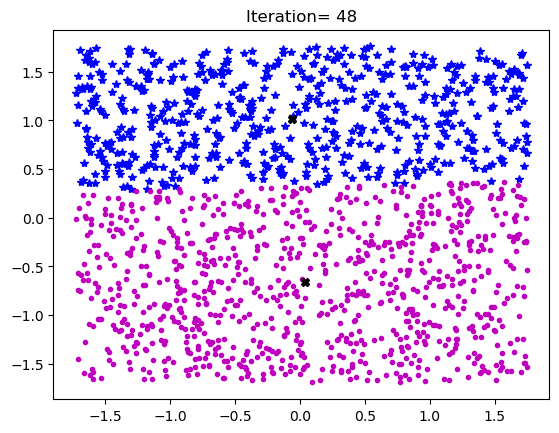

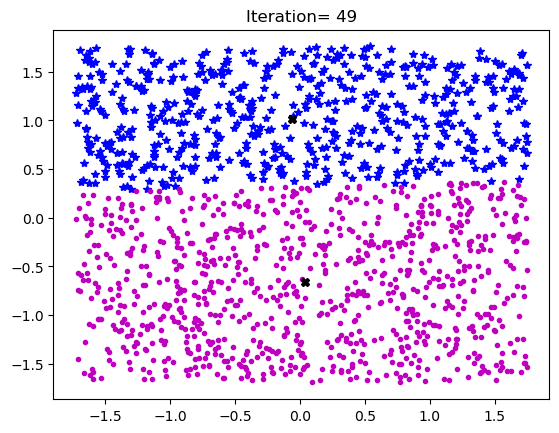

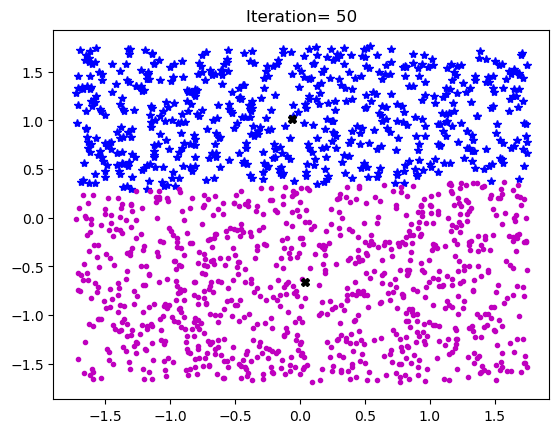

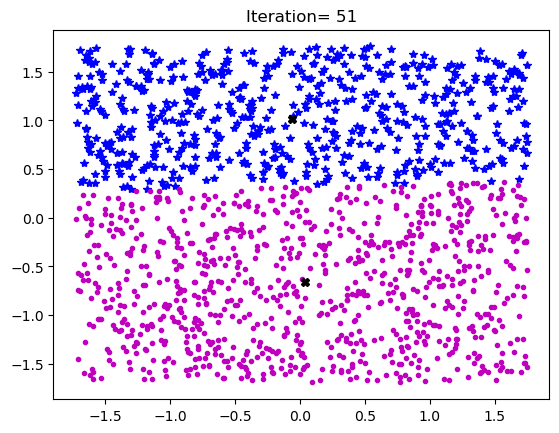

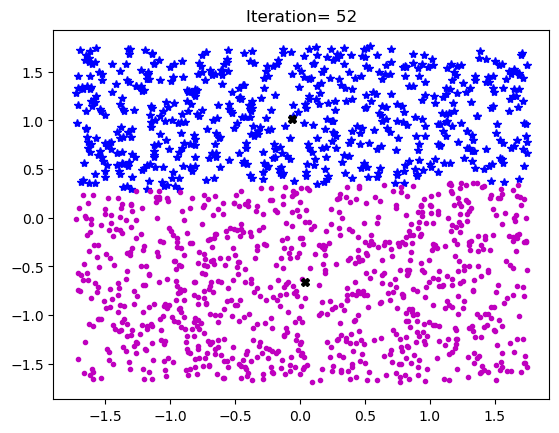

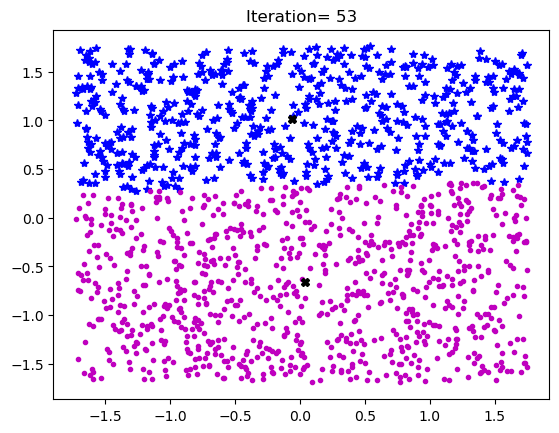

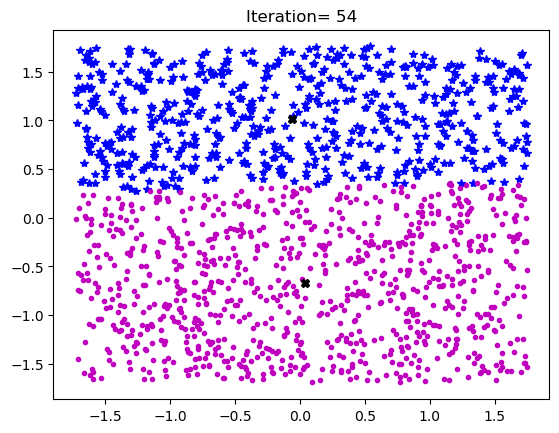

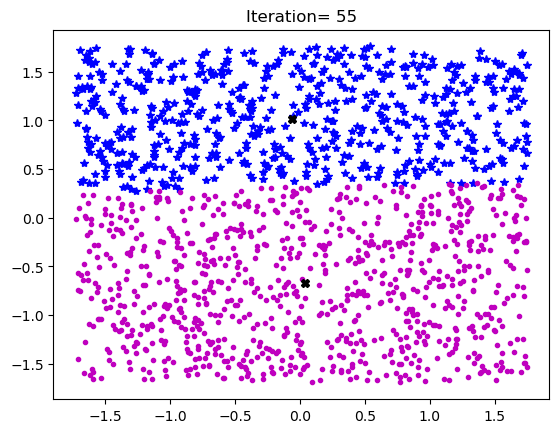

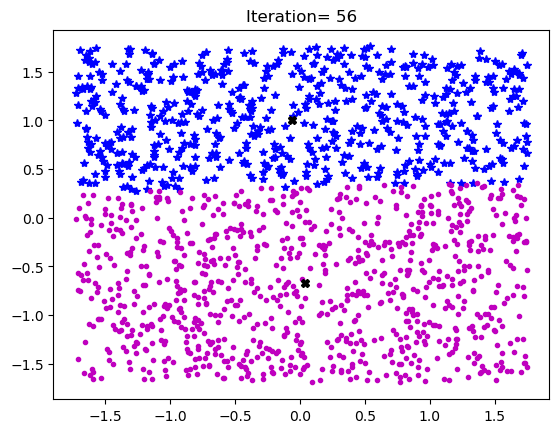

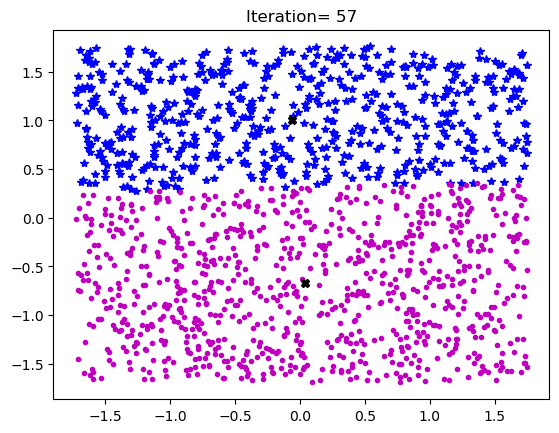

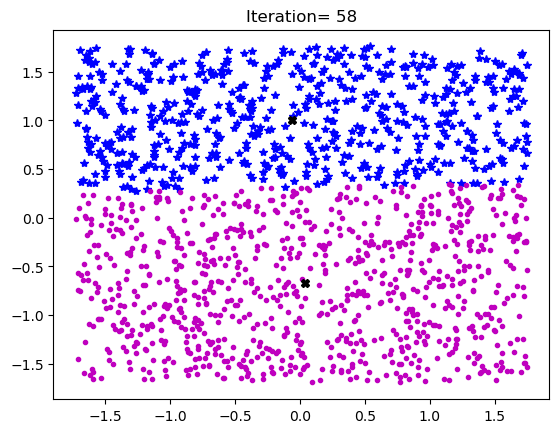

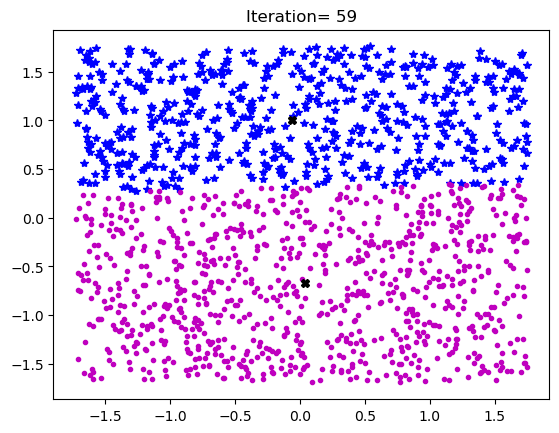

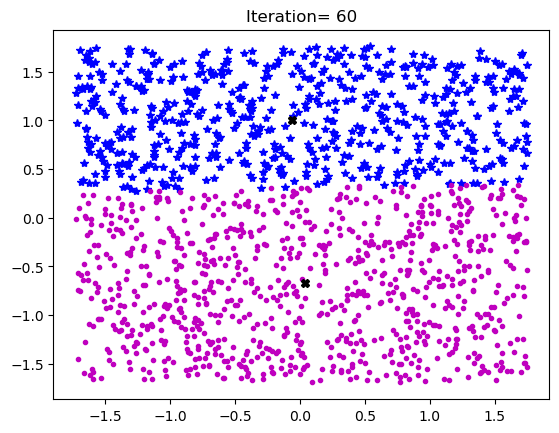

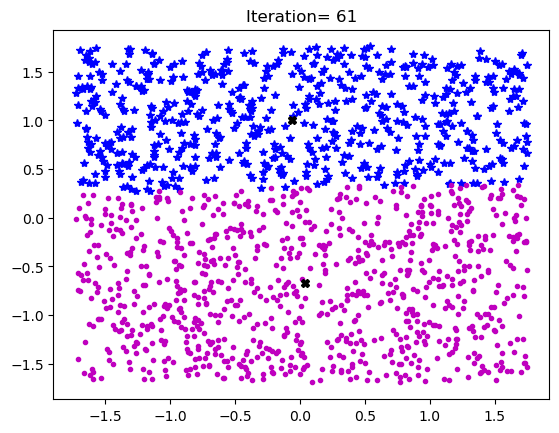

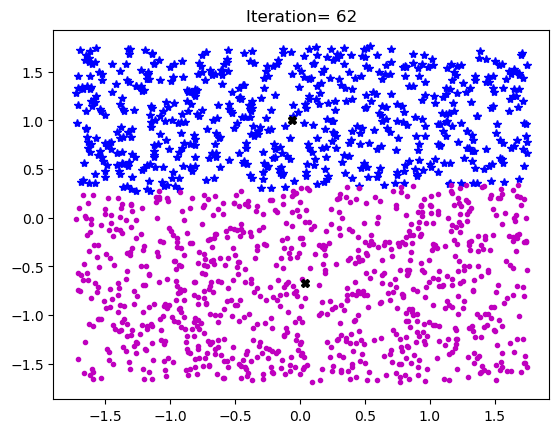

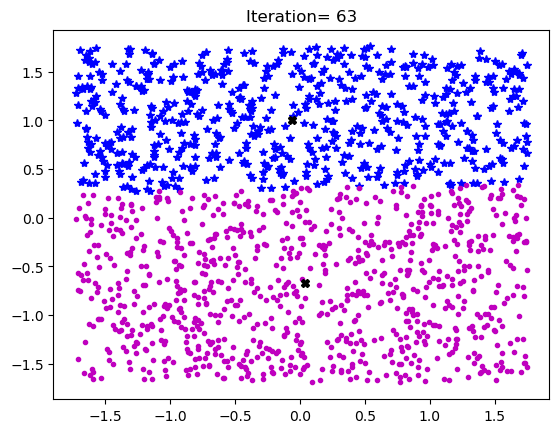

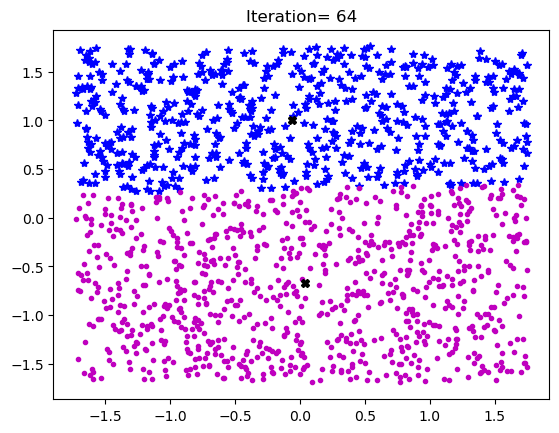

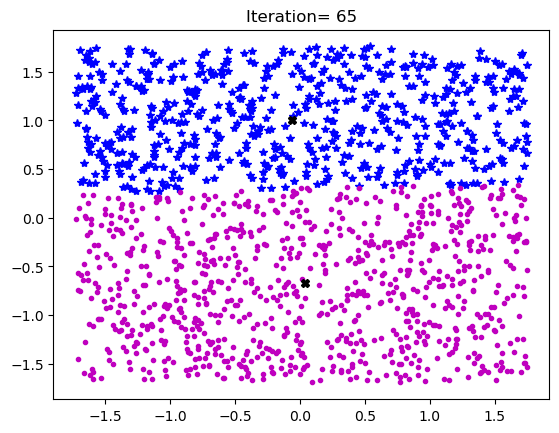

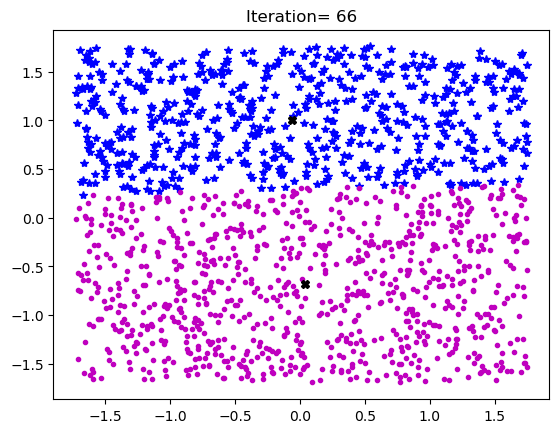

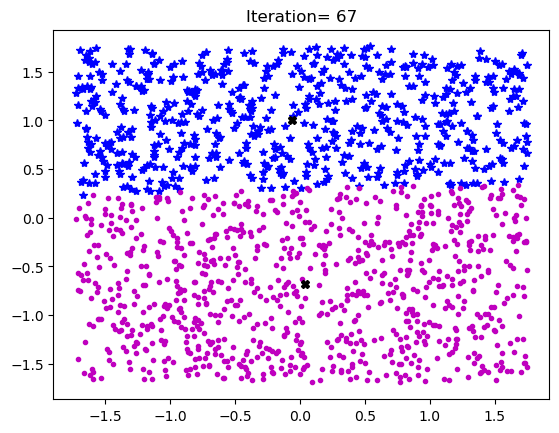

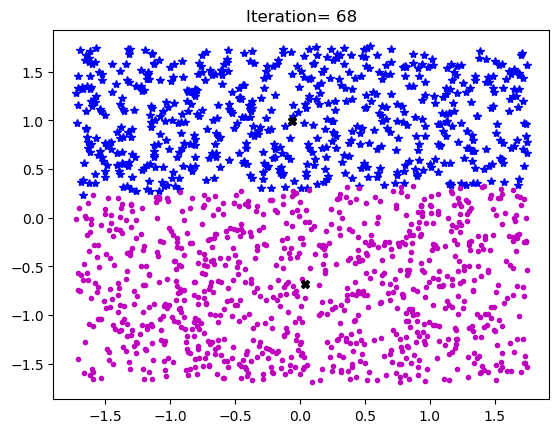

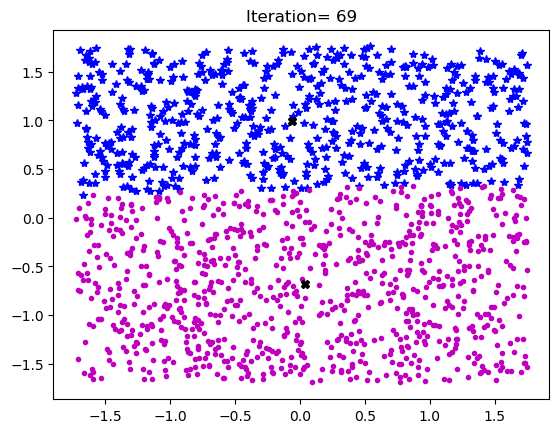

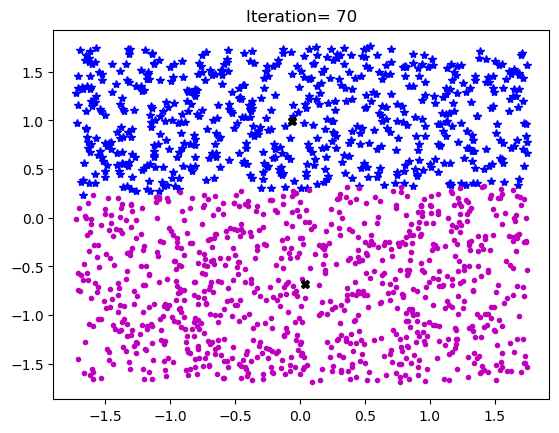

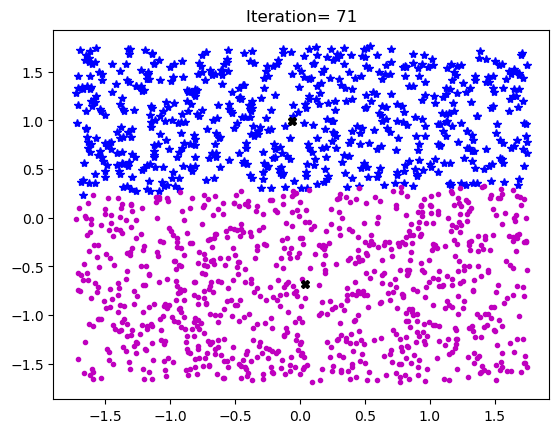

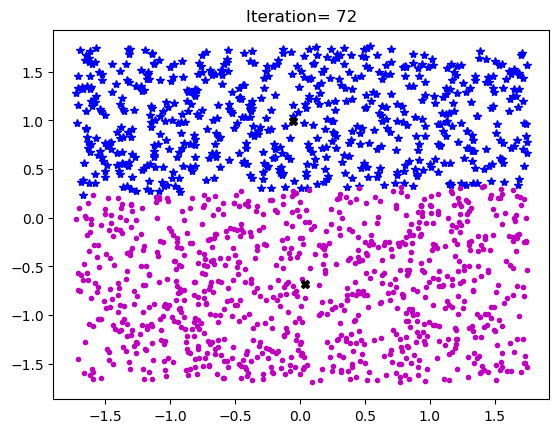

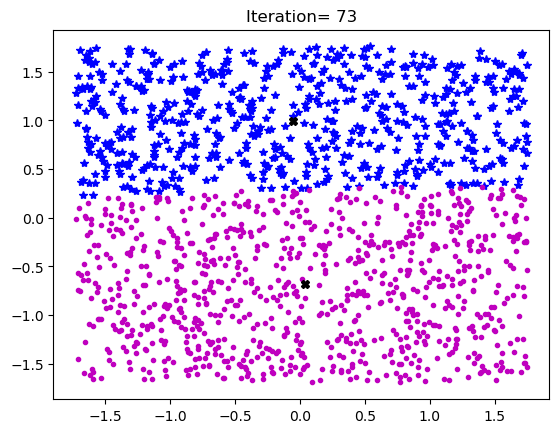

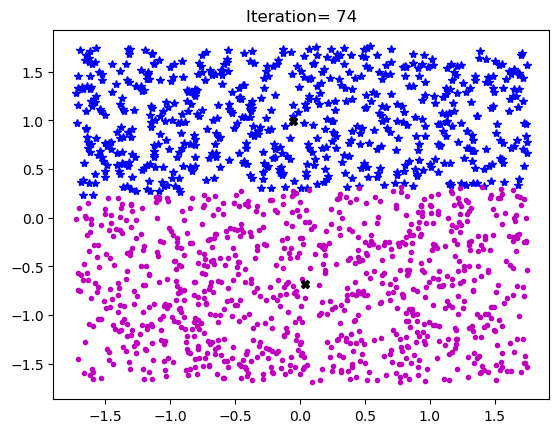

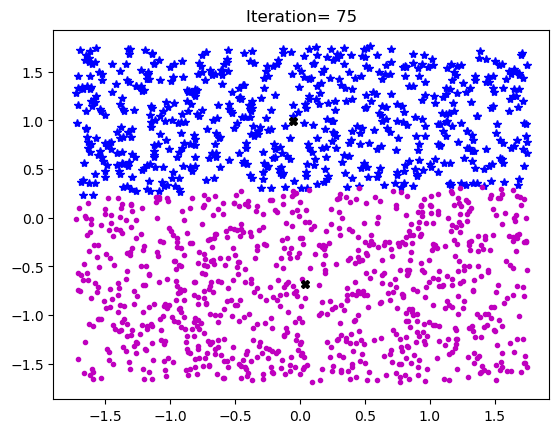

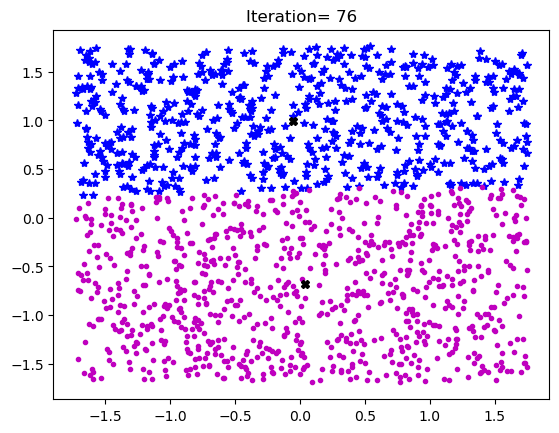

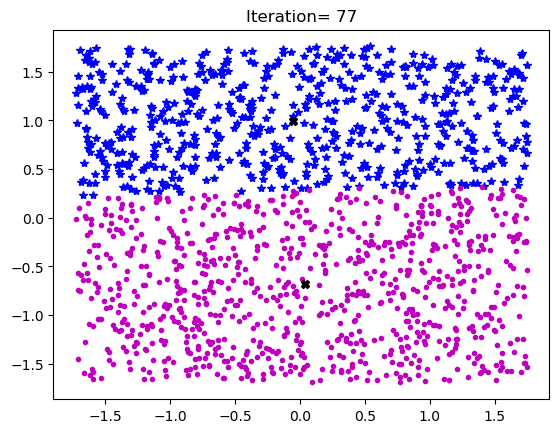

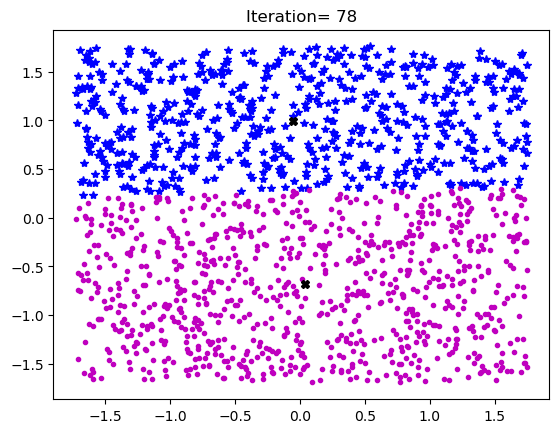

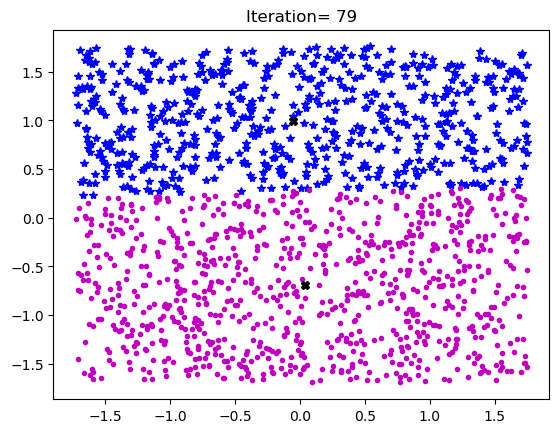

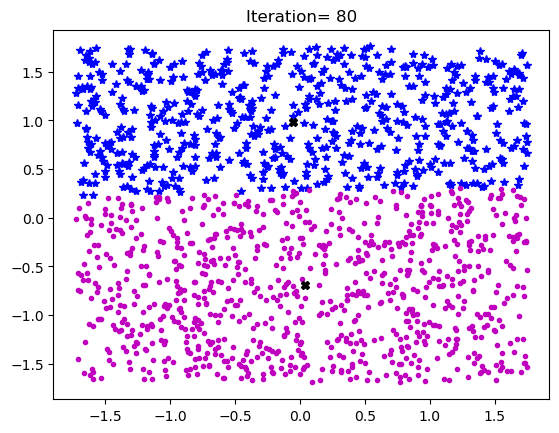

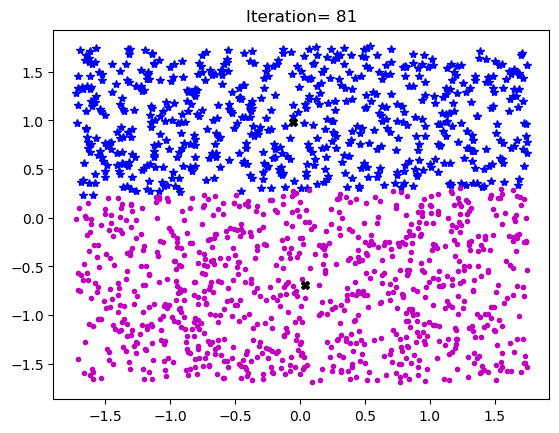

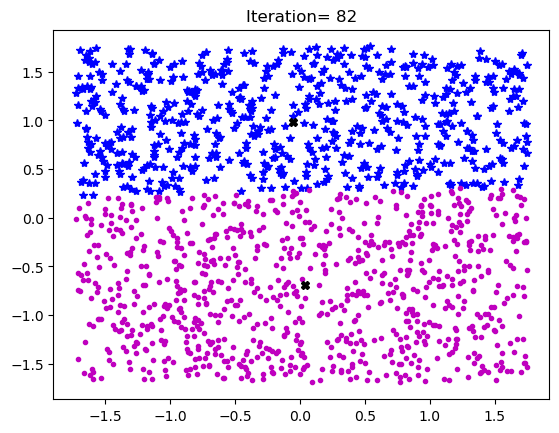

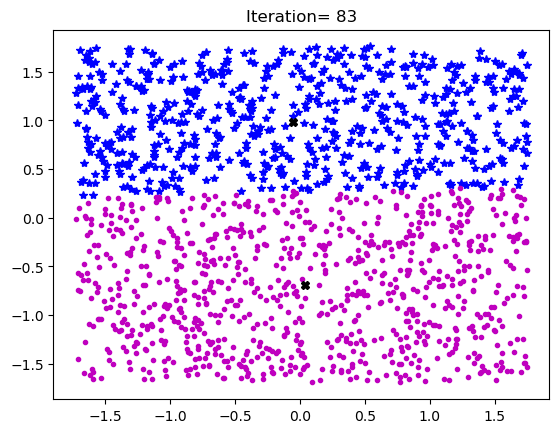

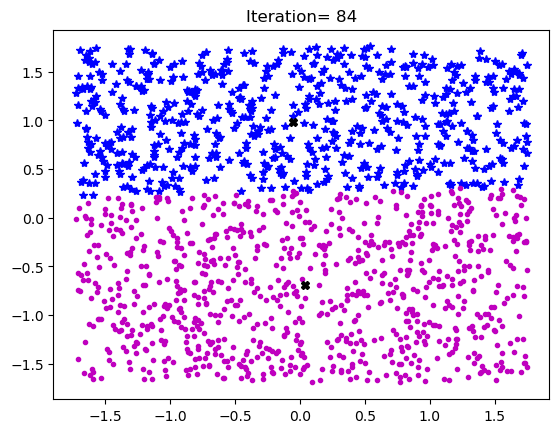

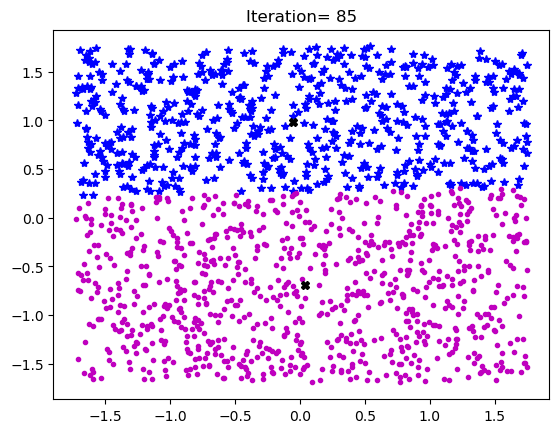

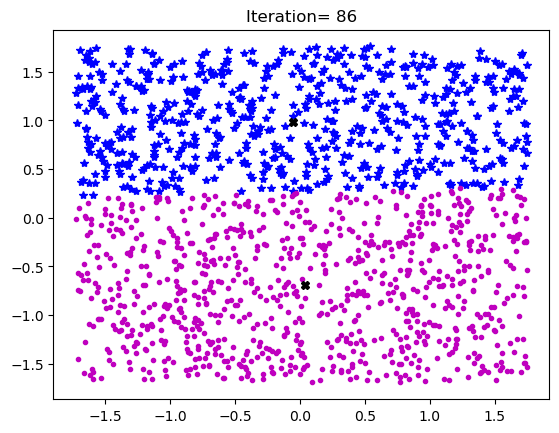

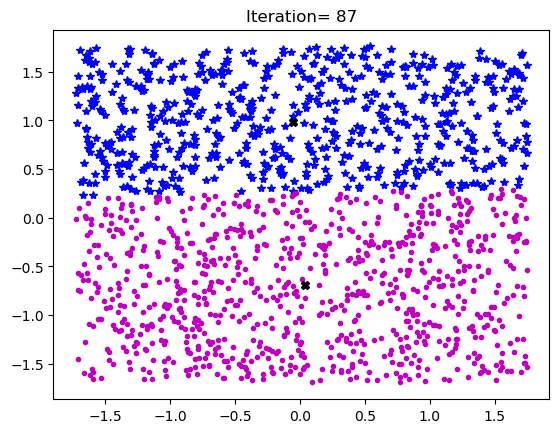

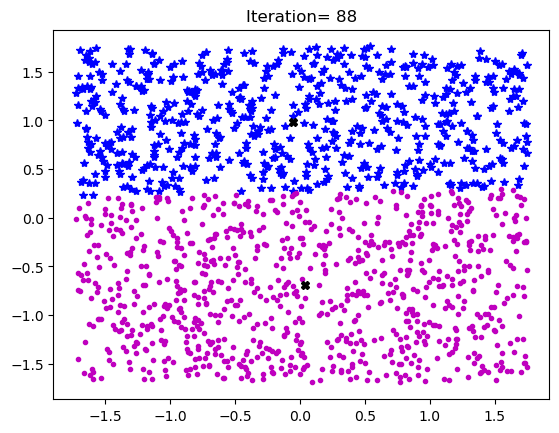

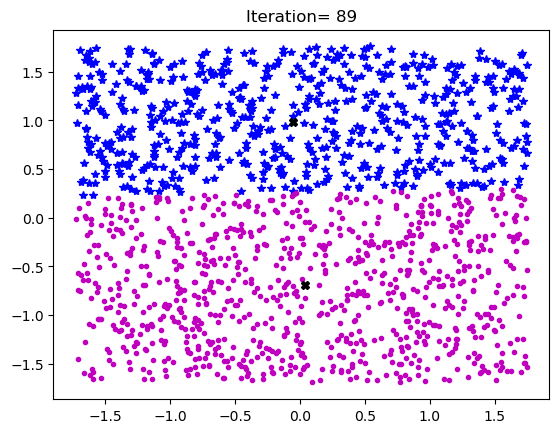

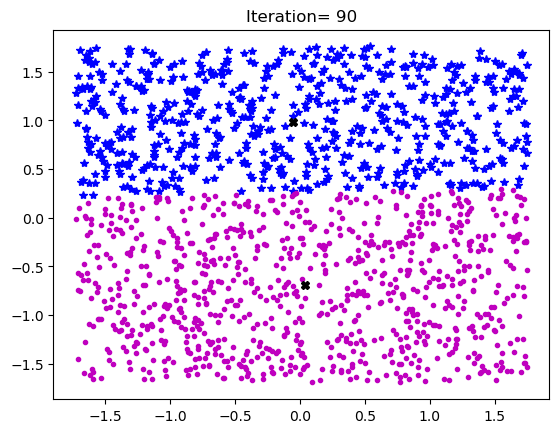

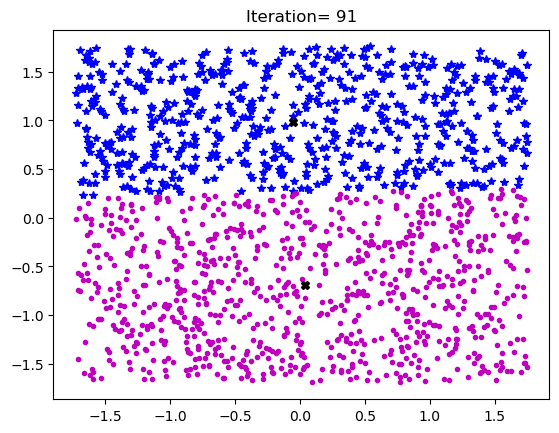

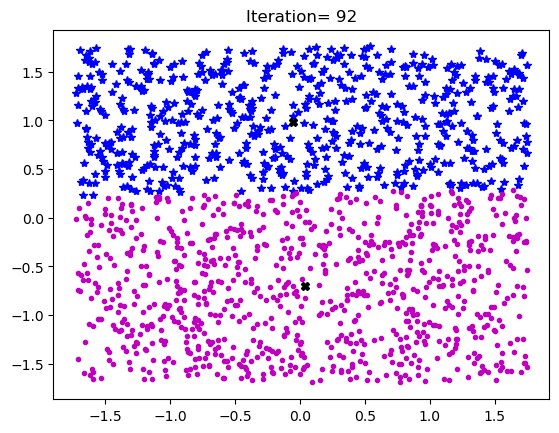

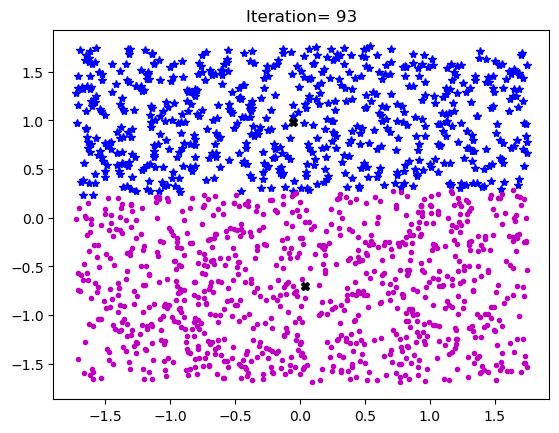

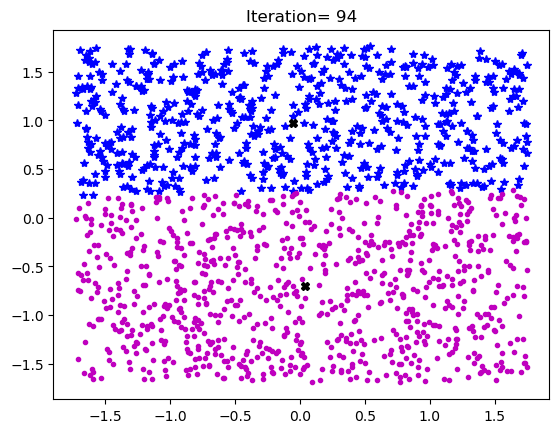

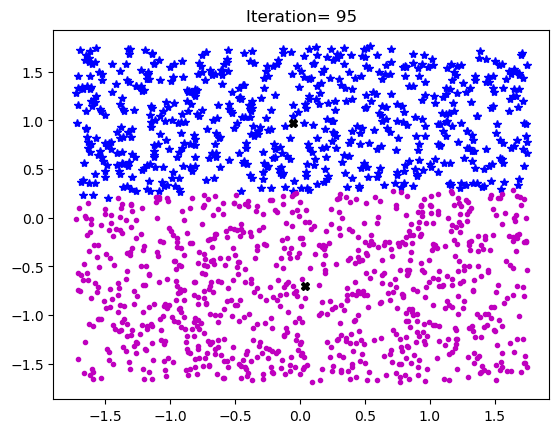

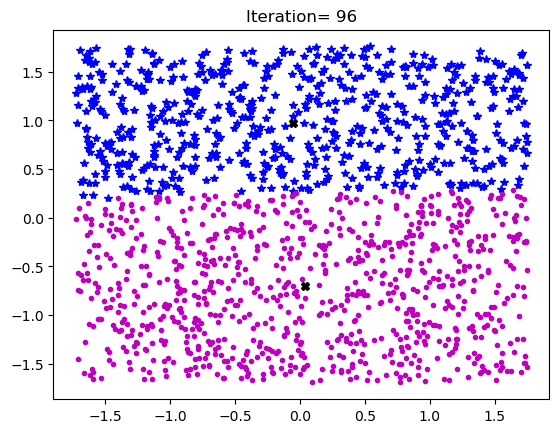

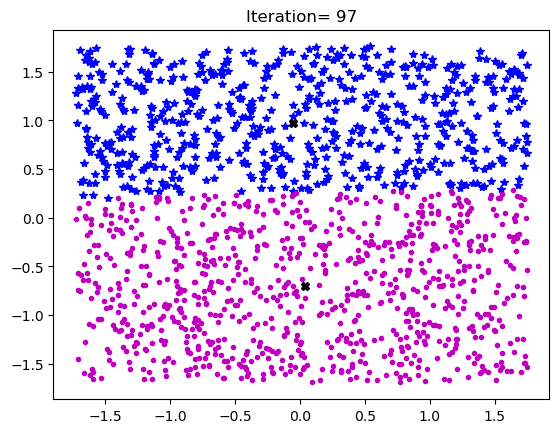

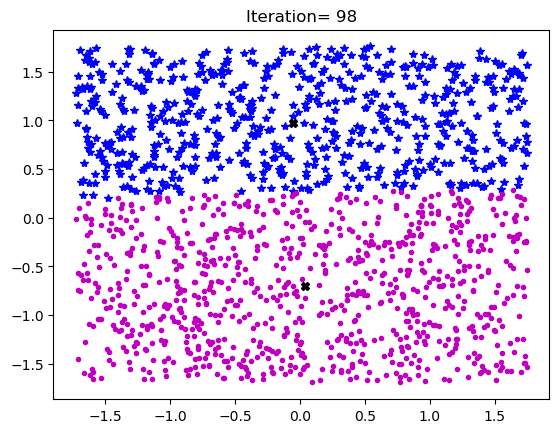

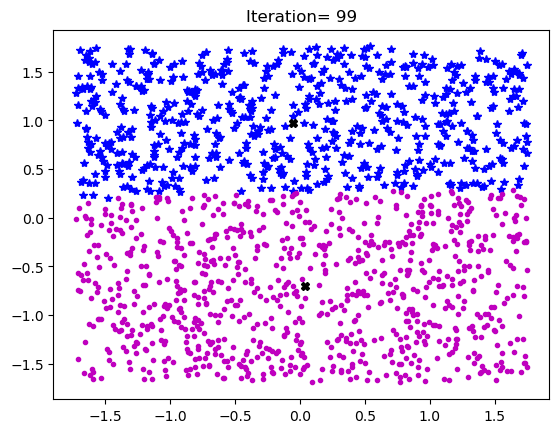

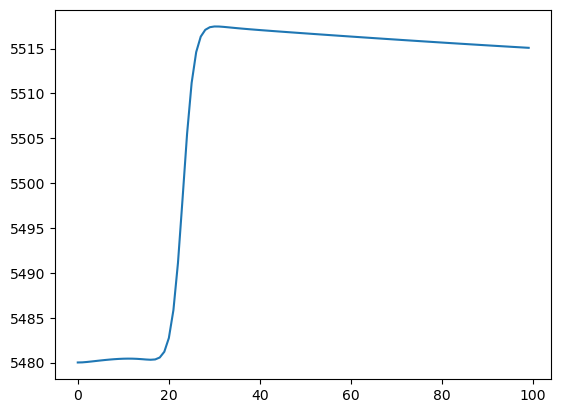

In [8]:
log_l=[]
Itr=100
eps=10**(-10)  # for threshold
clr=['b','m','g','r']
mrk=['*','.','x','+']


K = 2 # no. of clusters

theta=initialization(X,K)

# print(theta)
for n in range(Itr):

  responsibility=E_Step_GMM(X,K,theta)

  cluster_label=np.argmax(responsibility,axis=1) #Label Points

  theta,log_likhd=M_Step_GMM(X,responsibility)

  log_l.append(log_likhd)

  plt.figure()
  for l in range(K):
    id=np.where(cluster_label==l)
    plt.plot(X[id,0],X[id,1],color=clr[l],marker=mrk[l])
  cntrd=theta[0].T
  plt.plot(cntrd[:,0],cntrd[:,1],'X',color='k')
  plt.title('Iteration= %d' % (n))

  if n>2:
    if abs(log_l[n]-log_l[n-1])<eps:
      break


plt.figure()  
plt.plot(log_l)

## DBSCAN Clustering

Set eps = 0.1, Minpoints = 5


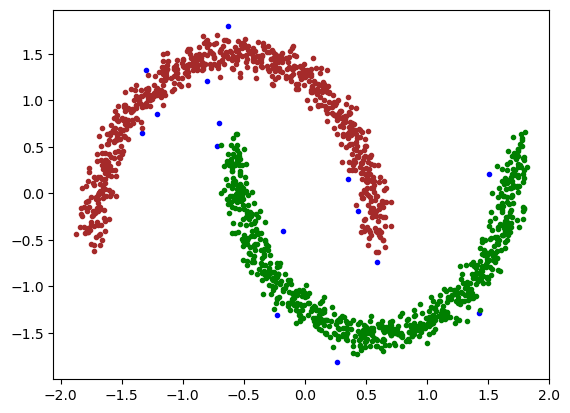

number of cluster found: 2
Counter({1: 743, 2: 742, 0: 15})
numbrer of outliers found: 15

Set eps = 0.2, Minpoints = 5


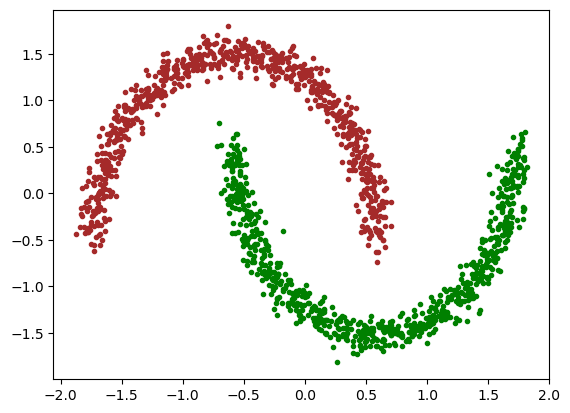

number of cluster found: 2
Counter({1: 750, 2: 750})
numbrer of outliers found: 0

Set eps = 0.3, Minpoints = 5


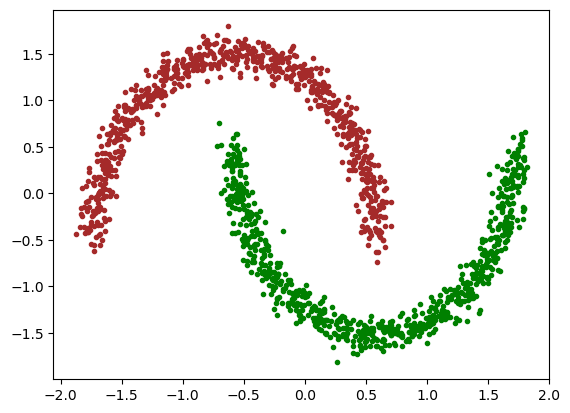

number of cluster found: 2
Counter({1: 750, 2: 750})
numbrer of outliers found: 0

Set eps = 0.4, Minpoints = 5


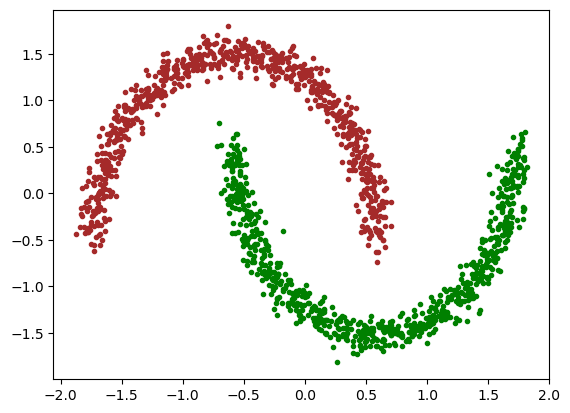

number of cluster found: 2
Counter({1: 750, 2: 750})
numbrer of outliers found: 0

Set eps = 0.5, Minpoints = 5


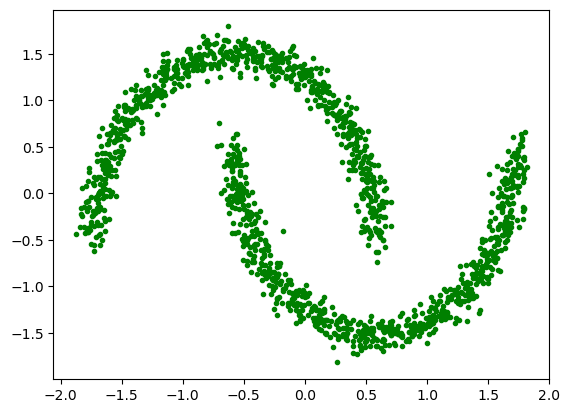

number of cluster found: 1
Counter({1: 1500})
numbrer of outliers found: 0



In [15]:
#Define label for differnt point group
NOISE = 0
UNASSIGNED = 0
core=-1
edge=-2



#function to find all neigbor points in radius
def neighbor_points(data, pointId, radius):
    points = []
    for i in range(len(data)):
        #Euclidian distance using L2 Norm
        if np.linalg.norm(data[i] - data[pointId]) <= radius:
            points.append(i)
    return points

#DB Scan algorithom
def dbscan(data, Eps, MinPt):
    #initilize all pointlable to unassign
    pointlabel  = [UNASSIGNED] * len(data)
    pointcount = []
    #initilize list for core/noncore point
    corepoint=[]
    noncore=[]
    
    #Find all neigbor for all point
    for i in range(len(data)):
        pointcount.append(neighbor_points(train,i,Eps))
    
    #Find all core point, edgepoint and noise
    for i in range(len(pointcount)):
        if (len(pointcount[i])>=MinPt):
            pointlabel[i]=core
            corepoint.append(i)
        else:
            noncore.append(i)

    for i in noncore:
        for j in pointcount[i]:
            if j in corepoint:
                pointlabel[i]=edge

                break
            
    #start assigning point to luster
    cl = 1
    #Using a Queue to put all neigbor core point in queue and find neigboir's neigbor
    for i in range(len(pointlabel)):
        q = queue.Queue()
        if (pointlabel[i] == core):
            pointlabel[i] = cl
            for x in pointcount[i]:
                if(pointlabel[x]==core):
                    q.put(x)
                    pointlabel[x]=cl
                elif(pointlabel[x]==edge):
                    pointlabel[x]=cl
            #Stop when all point in Queue has been checked   
            while not q.empty():
                neighbors = pointcount[q.get()]
                for y in neighbors:
                    if (pointlabel[y]==core):
                        pointlabel[y]=cl
                        q.put(y)
                    if (pointlabel[y]==edge):
                        pointlabel[y]=cl            
            cl=cl+1 #move to next cluster
           
    return pointlabel,cl
    
#Function to plot final result
def plotRes(data, clusterRes, clusterNum):
    nPoints = len(data)
    scatterColors = ['black', 'green', 'brown', 'red', 'purple', 'orange', 'yellow']
    for i in range(clusterNum):
        if (i==0):
            #Plot all noise point as blue
            color='blue'
        else:
            color = scatterColors[i % len(scatterColors)]
        x1 = [];  y1 = []
        for j in range(nPoints):
            if clusterRes[j] == i:
                x1.append(data[j, 0])
                y1.append(data[j, 1])
        plt.scatter(x1, y1, c=color, alpha=1, marker='.')


#Load Data
# raw = spio.loadmat('DBSCAN.mat')
# train = raw['Points']
train=X

#Set EPS and Minpoint
epss = [0.1,0.2,0.3,0.4,0.5]
minptss = [5]
# Find ALl cluster, outliers in different setting and print resultsw
for eps in epss:
    for minpts in minptss:
        print('Set eps = ' +str(eps)+ ', Minpoints = '+str(minpts))
        pointlabel,cl = dbscan(train,eps,minpts)
        plotRes(train, pointlabel, cl)
        plt.show()
        print('number of cluster found: ' + str(cl-1))
        counter=collections.Counter(pointlabel)
        print(counter)
        outliers  = pointlabel.count(0)
        print('numbrer of outliers found: '+str(outliers) +'\n')

## Different Clustering Algorithms using In-Built Functions

In [16]:
  # estimate bandwidth for mean shift
bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
connectivity = kneighbors_graph(X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)

two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])

ward = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage='ward',connectivity=connectivity)

spectral = cluster.SpectralClustering(n_clusters=params['n_clusters'], eigen_solver='arpack',affinity="nearest_neighbors")

dbscan = cluster.DBSCAN(eps=params['eps'])

optics = cluster.OPTICS(min_samples=params['min_samples'],xi=params['xi'],min_cluster_size=params['min_cluster_size'])

affinity_propagation = cluster.AffinityPropagation(damping=params['damping'], preference=params['preference'])

average_linkage = cluster.AgglomerativeClustering(linkage="average", affinity="cityblock",n_clusters=params['n_clusters'], connectivity=connectivity)

birch = cluster.Birch(n_clusters=params['n_clusters'])

gmm = mixture.GaussianMixture(n_components=params['n_clusters'], covariance_type='full')

clustering_algorithms = (
        ('MiniBatch\nKMeans', two_means),
        ('Affinity\nPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('Spectral\nClustering', spectral),
        ('Ward', ward),
        ('Agglomerative\nClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('OPTICS', optics),
        ('BIRCH', birch),
        ('Gaussian\nMixture', gmm)
    )

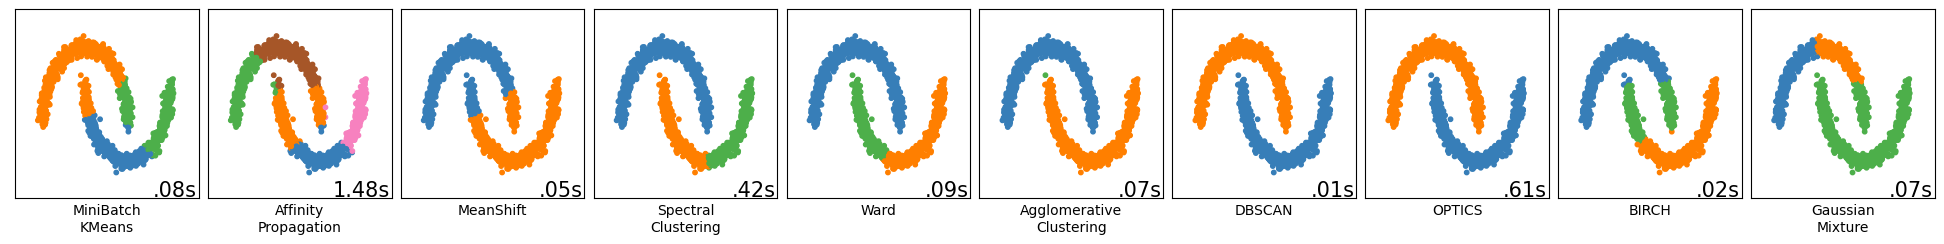

In [17]:
plt.figure(figsize=(20,4))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.95, wspace=0.05,
                    hspace=.01)

plot_num=1
for name, algorithm in clustering_algorithms:
  t0 = time.time()

        # catch warnings related to kneighbors_graph
  with warnings.catch_warnings():
    warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
    warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
    algorithm.fit(X)
    
  t1 = time.time()
  if hasattr(algorithm, 'labels_'):
    y_pred = algorithm.labels_.astype(int)
  else:
    y_pred = algorithm.predict(X)

  plt.subplot(len(dataset), len(clustering_algorithms), plot_num)

  if i_dataset == 0:
    plt.title(name, size=18)
  
  colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
  colors = np.append(colors, ["#000000"])
  plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

  plt.xlim(-2.5, 2.5)
  plt.ylim(-2.5, 2.5)
  plt.xticks(())
  plt.yticks(())
  plt.xlabel(name)
  plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
  plot_num += 1

plt.show()